# LSTM

### Part 1 - Data PreProcessing

**import libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Import Training Dataset**

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#create a dataset with open column only and convert it to numpy array
training_set = dataset_train.iloc[:, 1:2].values
print(type(training_set))
print(training_set)

<type 'numpy.ndarray'>
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


**Feature Scaling**

<img src="Feature Scaling.jpg">

In [5]:
from sklearn.preprocessing import MinMaxScaler

# feature range between 0 and 1 bacause all scaled stock
# values will be between 0 and 1
# apply normalisation
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


**Creating a data structure of 60 timesteps and 1 output**
- 60 timesteps means that the RNN will look at the past 60 days to predict the stock price the next day 
- in each month, there are 20 days of stock, so 60 means 3 months of stock


In [7]:
x_train = []
y_train = []
for i in range(60, 1258):
    # we start with 60 to append the 60 stock price
    x_train.append(training_set_scaled[i - 60: i, 0])
    y_train.append(training_set_scaled[i , 0])

#convert x_train and y_train to numpy array to be accepted by RNN    
x_train, y_train = np.array(x_train), np.array(y_train)    

In [8]:
print(x_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


In [9]:
print(y_train)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


**Reshape**

- Input shape in keras
- 3D tensor with shape (batch_size, timesteps, input_dim).

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Part 2 - Building the RNN

**Import Libraries**

In [11]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [25]:
regressor = Sequential()

# First LSTM layer and Dropout
regressor.add(LSTM(units= 50, return_sequences= True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# second LSTM layer and Dropout
regressor.add(LSTM(units= 50, return_sequences= True))
regressor.add(Dropout(0.2))

# Third LSTM layer and Dropout
regressor.add(LSTM(units= 60, return_sequences= True))
regressor.add(Dropout(0.2))

# Forth LSTM layer and Dropout
regressor.add(LSTM(units= 70, return_sequences= True))
regressor.add(Dropout(0.2))

# Fifth LSTM layer and Dropout
regressor.add(LSTM(units= 80))
regressor.add(Dropout(0.2))

# Output Layer
regressor.add(Dense(units= 1))

In [26]:
# Compile The RNN
regressor.compile(optimizer= 'adam', loss= 'mean_squared_error')

In [27]:
# Fitting the RNN to the training set
regressor.fit(x_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0319
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0059
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0053
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0052
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 7s 5ms/step - loss: 0.0046
Epoch 9/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0037
Epoch 11/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0035
Epoch 12/100
1198/1198 [==============================] - 7s 6ms/step - lo

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0014
Epoch 98/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 8s 6ms/step - loss: 0.0014


### Part 3 - Making the predictions and visulaising the results

**Getting the real stock price of 2017**


In [28]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

**Getting the predicted stock price of 2017**

- to get prediction of the any day of January 2017, we should have 60 days before it  
- so we will merge the original train set and test set, then assign 60 days before any day in test data
- then, reshape and scale inputs data

In [29]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis= 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values
inputs = inputs.reshape(-1, 1)
inputs = sc.fit_transform(inputs)

x_test = []
for i in range(60, 80):
    x_test.append(inputs[i - 60 : i, 0])
   
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
#predict
predicted_stock_price = regressor.predict(x_test)

In [31]:
#inverse the scale of predicted values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [32]:
print(predicted_stock_price)

[[787.711  ]
 [784.4881 ]
 [782.9932 ]
 [783.36926]
 [786.4164 ]
 [793.28455]
 [800.7184 ]
 [803.99896]
 [804.4998 ]
 [803.9733 ]
 [803.2133 ]
 [802.39453]
 [801.73145]
 [801.90594]
 [802.80963]
 [807.8619 ]
 [816.3606 ]
 [824.95526]
 [827.489  ]
 [821.3671 ]]


**Visulaising the results**

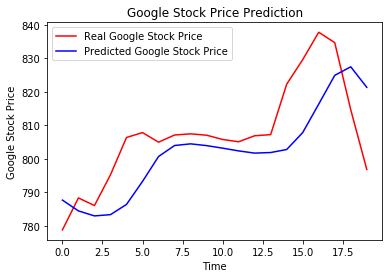

In [33]:
plt.plot(real_stock_price, color= 'red', label= 'Real Google Stock Price')
plt.plot(predicted_stock_price, color= 'blue', label= 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [34]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

In [35]:
print(rmse)

12.5437428634
